In [241]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

In [242]:
def check_and_create_folder(folder_path, name_fold = "simu"):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        #return folder_path

    # Look for folders starting with "simu_"
    existing_folders = [name for name in os.listdir(folder_path) if name.startswith(f"{name_fold}_")]
    #print(f"{name}_")
    if not existing_folders:
        new_folder_name = f"{name_fold}_0001"
    else:
        # Sort the existing folders to find the highest numbered folder
        existing_folders.sort()
        last_folder_number = int(existing_folders[-1][len(name_fold)+1:])  # Extract the number from the folder name 
        #print(os.path.join(folder_path, existing_folders[-1]), len(os.listdir(os.path.join(folder_path, existing_folders[-1]))))   
        new_folder_number = last_folder_number  if  len(os.listdir(os.path.join(folder_path, existing_folders[-1]))) ==0 else last_folder_number +1
        #print(new_folder_number)
        new_folder_name = f"{name_fold}_{new_folder_number:04d}"

    new_folder_path = os.path.join(folder_path, new_folder_name)
    os.makedirs(new_folder_path, exist_ok=True)

    return new_folder_path

In [243]:
folder_path = check_and_create_folder("./dio_ti_prego3_imgs")

In [244]:
run_folder = "dio_ti_prego3/simu_0004"

edge_infos = sorted([f for f in os.listdir(run_folder) if "edge_info" in f], key=lambda x: int(x.split('_')[0]))
vehicle_infos = sorted([f for f in os.listdir(run_folder) if "vehicle_info" in f], key=lambda x: int(x.split('_')[0]))
road_infos = sorted([f for f in os.listdir(run_folder) if "road_info" in f], key=lambda x: int(x.split('_')[0]))
requests_info = sorted([f for f in os.listdir(run_folder) if "requests_info" in f], key=lambda x: int(x.split('_')[0]))

# Road Analysis

In [245]:
road_df = pd.DataFrame(columns=["edge"]+[i+1 for i in range(len(road_infos))])

In [246]:
number_of_requests = []
for i, road_info_name in enumerate(road_infos):
    n = int(road_info_name.split("_")[0])
    ri_df = pd.read_csv(os.path.join(run_folder, road_info_name))
    #do this only once I guess??
    road_df["edge"] = ri_df["edge"]
    number_of_requests += [n+20]
    sum_rows = ri_df[ri_df.columns[2:]].sum(axis=1).astype(int)
    road_df[n] = sum_rows


In [247]:
road_df.columns

Index(['edge', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='object')

In [248]:
#plt.figure(figsize=(40, 6))
#max_value = road_df.drop("edge", inplace=False, axis=1).values.max()+1
#for i, col in enumerate(road_df.columns[1:]):
#    # Add an offset to each series
#    offset = max_value * i
#    plt.plot(road_df['edge'], road_df[col] + offset, label=col)
#
## Set ticks and labels for y-axis
#plt.yticks([max_value * i + max_value / 2 for i in range(len(road_df.columns[1:]))], road_df.columns[1:])
#plt.ylabel('Run')
#plt.xticks(rotation='vertical')
##plt.legend()
#plt.grid(False)
#plt.show()

In [249]:
import matplotlib.pyplot as plt


y_values = list(road_df[road_df.columns[1:]].sum(axis=1).astype(int))

x_values = range(1, len(y_values) + 1)
"""
plt.bar(x_values, y_values, color='blue', edgecolor='black')

# Customize labels and title
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show plot
plt.show()"""


"\nplt.bar(x_values, y_values, color='blue', edgecolor='black')\n\n# Customize labels and title\nplt.xlabel('Bins')\nplt.ylabel('Frequency')\nplt.title('Histogram')\n\n# Show plot\nplt.show()"

In [250]:
import matplotlib.pyplot as plt


y_values = list(road_df[road_df.columns[1:]].sum(axis=0).astype(int))
x_values = number_of_requests
"""
plt.bar(x_values, y_values, color='blue', edgecolor='black')

# Customize labels and title
plt.xlabel('Requests')
plt.ylabel('Number of Used Roads')
plt.title('Total Road Usage per number of requests')

# Show plot
plt.show()"""


"\nplt.bar(x_values, y_values, color='blue', edgecolor='black')\n\n# Customize labels and title\nplt.xlabel('Requests')\nplt.ylabel('Number of Used Roads')\nplt.title('Total Road Usage per number of requests')\n\n# Show plot\nplt.show()"

In [251]:
road_df_total_use = pd.DataFrame()
road_df_total_use['edge'] = road_df["edge"]
road_df_total_use['usage'] = road_df[road_df.columns[1:]].sum(axis=1).astype(int)

In [252]:

minima = min(road_df_total_use['usage'])
maxima = 10#max(road_df_total_use['usage'])
print(minima, max(road_df_total_use['usage']))
norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Spectral_r)


0 16


In [253]:
plt.rcParams.update({'font.size': 44})

In [254]:
import osmnx as ox
if False:
    graph = ox.graph_from_place("Manhattan, New York, USA", network_type="drive_service", custom_filter='["highway"~"primary|secondary"]')
    fig, ax = ox.plot_graph(graph, node_size=1, show=False, close=False,bgcolor='white', edge_color='black', figsize=(20, 20) )
    for edge, usage in zip(road_df_total_use['edge'],road_df_total_use['usage']):
        node1, node2 = int(edge.split("-")[0]), int(edge.split("-")[1])
        #print(node1, node2)
        # Get node coordinates
        x1, y1 = graph.nodes[node1]['x'], graph.nodes[node1]['y']
        x2, y2 = graph.nodes[node2]['x'], graph.nodes[node2]['y']
        # Plot edge

        ax.scatter(x1, y1, color="black", s=2)
        ax.scatter(x2, y2, color="black", s=2)

        ax.plot([x1, x2], [y1, y2], color=mapper.to_rgba(usage), linewidth=4)  # You can adjust color and linewidth as needed





    norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima) 
    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('Spectral_r'), norm =norm) 

    plt.colorbar(sm,label="Road Usage", orientation="vertical") 
    plt.savefig(f'{folder_path}/nyc_road_usage.png', dpi=300, bbox_inches='tight')

    #plt.show()
    ax.clear()

# Vehicle Charge

In [255]:
vehicles_df_iterations = pd.DataFrame(columns=["old_charge", "new_charge", "old_startdepot", "new_startdepot"])
vehicles_df_ids = pd.DataFrame(columns=["old_charge", "new_charge", "old_startdepot", "new_startdepot"])

In [256]:
temp = {}
for i, vehicles_df_name in enumerate(vehicle_infos):
    vi_df = pd.read_csv(os.path.join(run_folder, vehicles_df_name))
    for c in vehicles_df_iterations.columns:
        if c not in temp.keys():
            print(f"{c} is not in the keys")
            temp[c] = []
        temp[c] += [list(vi_df[c])]

vehicles_df_iterations = pd.concat([vehicles_df_iterations, pd.DataFrame.from_dict(temp)], ignore_index=True)

old_charge is not in the keys
new_charge is not in the keys
old_startdepot is not in the keys
new_startdepot is not in the keys


In [257]:
vehicles_df_iterations

,old_charge,new_charge,old_startdepot,new_startdepot
0,"[3.780043567190811, 34.18720516532793, 95.2615...","[33.78004356719081, 64.18720516532792, 100.0, ...","[42430044, 42430044, 42430044, 6177439750, 424...","[42432963, 42432963, 42432963, 6177439750, 424..."
1,"[33.78004356719081, 55.57346316532792, 100.0, ...","[63.78004356719081, 85.57346316532792, 100.0, ...","[42432963, 42432963, 42432963, 6177439750, 424...","[42432963, 42430044, 42432963, 6177439750, 424..."
2,"[63.78004356719081, 14.92249825670793, 100.0, ...","[93.7800435671908, 44.92249825670793, 100.0, 1...","[42432963, 42430044, 42432963, 6177439750, 424...","[42432963, 42432963, 42432963, 6177439750, 424..."
3,"[93.7800435671908, 41.52071871178052, 100.0, 3...","[100.0, 71.52071871178052, 100.0, 68.290163038...","[42432963, 42432963, 42432963, 6177439750, 424...","[42432963, 42430044, 42432963, 42430044, 42430..."
4,"[57.73975766312199, 71.52071871178052, 100.0, ...","[87.73975766312199, 100.0, 100.0, 98.290163038...","[42432963, 42430044, 42432963, 42430044, 42430...","[42430044, 42430044, 42432963, 42430044, 42430..."
5,"[58.83407213532249, 100.0, 91.9546, 95.4683481...","[88.83407213532249, 100.0, 100.0, 100.0, 87.60...","[42430044, 42430044, 42432963, 42430044, 42430...","[42432963, 42430044, 42430044, 6177439750, 617..."
6,"[41.37168379516582, 100.0, 70.2697116829011, 1...","[71.37168379516582, 100.0, 100.0, 100.0, 100.0...","[42432963, 42430044, 42430044, 6177439750, 617...","[42430044, 42430044, 42432963, 6177439750, 617..."
7,"[71.37168379516582, 100.0, 91.386258, 100.0, 8...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[42430044, 42430044, 42432963, 6177439750, 617...","[42430044, 42430044, 42430044, 6177439750, 424..."
8,"[90.58239512581032, 100.0, 100.0, 100.0, 100.0...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[42430044, 42430044, 42430044, 6177439750, 424...","[42432963, 42430044, 42430044, 6177439750, 424..."
9,"[100.0, 97.17818508556614, 48.70767782665225, ...","[100.0, 100.0, 78.70767782665226, 100.0, 100.0...","[42432963, 42430044, 42430044, 6177439750, 424...","[42432963, 42432963, 42432963, 6177439750, 617..."


In [258]:
def simple_plot_vehicle(df, x_values, metric, fig_size=(20, 20)):
    if not isinstance(x_values, list):
        x_values = [x_values]
    
    markers = ['o', 's', '^', 'D', 'x', '+', '*', 'P', '|', 'H', 'v', '<', '>', 'd', '.', ',', '_',
               '1', '2', '3', '4', '8', 'h', 'p']  # List of markers
    
    plt.figure(figsize=fig_size)
    for i, id in enumerate(x_values):
        y = df[metric][id]
        x = range(len(y))
        marker = markers[i % len(markers)]  # Cycling through markers for each value
        plt.plot(x, y, marker=marker, label=str(id))  # Using different marker for each value
    plt.legend()
    plt.show()

In [259]:
def simple_plot_vehicle_average_values(df, x_values, metric, fig_size=(20, 20), sli = [], only_values = False):
    if not isinstance(x_values, list):
        x_values = [x_values]
    
    y = []
    for id in x_values:
        y +=[ sum(df[metric][id][sli])/len(df[metric][id][sli])]

        
    
    x = range(len(x_values))
    if only_values:
        print(x)
        print(y)
        return y
    plt.figure(figsize=fig_size)
    plt.legend(x_values)
    plt.bar(x, y, tick_label=x_values)
    plt.xlabel('X Values')
    plt.ylabel('Average Metric Value')
    plt.title('Average Metric Value for Each X Value')
    plt.show() 

In [260]:
simple_plot_vehicle_average_values(vehicles_df_iterations, list(vehicles_df_iterations.index), "new_charge", fig_size=(20, 20), sli = slice(0,-1), only_values=True)

range(0, 10)
[87.41929471969421, 92.88169441485597, 94.1044974870313, 96.22425077347211, 96.957107734394, 96.87722451611191, 96.61194996479144, 94.66362714191084, 96.0778481303798, 97.46194032210718]


[87.41929471969421,
 92.88169441485597,
 94.1044974870313,
 96.22425077347211,
 96.957107734394,
 96.87722451611191,
 96.61194996479144,
 94.66362714191084,
 96.0778481303798,
 97.46194032210718]

In [261]:
temp = {}
for i, vehicles_df_name in enumerate(vehicle_infos):
    vi_df = pd.read_csv(os.path.join(run_folder, vehicles_df_name))
    for j in list(vi_df["id"]):
        if i ==0:
            temp[j] = {c:[vi_df.iloc[j][c]] for c in vehicles_df_ids.columns}
            continue
        for c in vehicles_df_ids.columns:
            temp[j][c] += [vi_df.iloc[j][c] ]
        #print(vi_df.iloc[j]["old_charge"])
       


In [262]:
vehicles_df_ids = pd.concat([vehicles_df_ids, pd.DataFrame.from_dict(temp, orient = "index")], ignore_index=True)

In [263]:
vehicles_df_ids

,old_charge,new_charge,old_startdepot,new_startdepot
0,"[3.780043567190811, 33.78004356719081, 63.7800...","[33.78004356719081, 63.78004356719081, 93.7800...","[42430044.0, 42432963.0, 42432963.0, 42432963....","[42432963.0, 42432963.0, 42432963.0, 42432963...."
1,"[34.18720516532793, 55.57346316532792, 14.9224...","[64.18720516532792, 85.57346316532792, 44.9224...","[42430044.0, 42432963.0, 42430044.0, 42432963....","[42432963.0, 42430044.0, 42432963.0, 42430044...."
2,"[95.26157080978192, 100.0, 100.0, 100.0, 100.0...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[42430044.0, 42432963.0, 42432963.0, 42432963....","[42432963.0, 42432963.0, 42432963.0, 42432963...."
3,"[20.01370958236381, 50.01370958236381, 80.0137...","[50.01370958236381, 80.01370958236382, 100.0, ...","[6177439750.0, 6177439750.0, 6177439750.0, 617...","[6177439750.0, 6177439750.0, 6177439750.0, 424..."
4,"[90.665641246356, 100.0, 100.0, 100.0, 100.0, ...","[100.0, 100.0, 100.0, 100.0, 100.0, 87.6053809...","[42430044.0, 42430044.0, 42430044.0, 42430044....","[42430044.0, 42430044.0, 42430044.0, 42430044...."
5,"[70.25496782523537, 100.0, 100.0, 100.0, 63.14...","[100.0, 100.0, 100.0, 100.0, 93.14125109601946...","[6177439750.0, 42430044.0, 42430044.0, 4243004...","[42430044.0, 42430044.0, 42430044.0, 42430044...."
6,"[100.0, 100.0, 100.0, 68.16709348154362, 98.16...","[100.0, 100.0, 100.0, 98.16709348154362, 100.0...","[6177439750.0, 6177439750.0, 6177439750.0, 617...","[6177439750.0, 6177439750.0, 6177439750.0, 424..."
7,"[36.30361124974599, 66.30361124974598, 96.3036...","[66.30361124974598, 96.30361124974598, 100.0, ...","[42430044.0, 6177439750.0, 6177439750.0, 61774...","[6177439750.0, 6177439750.0, 6177439750.0, 617..."
8,"[39.37235302861055, 69.37235302861055, 99.3723...","[69.37235302861055, 99.37235302861056, 100.0, ...","[42430044.0, 6177439750.0, 6177439750.0, 61774...","[6177439750.0, 6177439750.0, 6177439750.0, 424..."
9,"[53.266251983342734, 83.26625198334273, 100.0,...","[83.26625198334273, 100.0, 100.0, 100.0, 100.0...","[42432963.0, 6223571524.0, 6223571524.0, 62235...","[6223571524.0, 6223571524.0, 6223571524.0, 622..."


In [264]:
list_of_values = simple_plot_vehicle_average_values(vehicles_df_ids, list(vehicles_df_ids.index), "new_charge", fig_size=(20, 20), sli = slice(0,-1), only_values=True)

range(0, 24)
[82.14284936613141, 85.13376503323826, 100.0, 88.51197169343956, 98.62282010380632, 98.72469905446764, 99.7963437201715, 87.37030932930588, 91.01601244877884, 93.54630139589034, 100.0, 97.91246211985819, 95.1257566447971, 99.50967975586885, 97.62621498679816, 91.98943448697703, 96.25246666582085, 96.65056236437067, 91.91421951366867, 98.5770771004343, 93.3351400263631, 95.32614077326588, 97.78270478329817, 100.0]


In [265]:
for i,value in enumerate(list_of_values):
    print(f"({i+1},{value})")

(1,82.14284936613141)
(2,85.13376503323826)
(3,100.0)
(4,88.51197169343956)
(5,98.62282010380632)
(6,98.72469905446764)
(7,99.7963437201715)
(8,87.37030932930588)
(9,91.01601244877884)
(10,93.54630139589034)
(11,100.0)
(12,97.91246211985819)
(13,95.1257566447971)
(14,99.50967975586885)
(15,97.62621498679816)
(16,91.98943448697703)
(17,96.25246666582085)
(18,96.65056236437067)
(19,91.91421951366867)
(20,98.5770771004343)
(21,93.3351400263631)
(22,95.32614077326588)
(23,97.78270478329817)
(24,100.0)


In [266]:
def simple_plot_vehicle(df, x_values, metric, fig_size=(20, 20), line_thickness=1, plotte = False):
    if not isinstance(x_values, list):
        x_values = [x_values]
    
    markers = ['o', 's', '^', 'D', 'x', '+', '*', 'P', '|', 'H', 'v', '<', '>', 'd', '.', ',', '_',
               '1', '2', '3', '4', '8', 'h', 'p']  # List of markers
    if plotte:
        plt.figure(figsize=fig_size)
    for i, id in enumerate(x_values):
        y = df[metric][id]
        x = range(len(y))
        if not plotte:
            for i in x:
                print(f"({i},{y[i]})")
            
                #print(y)
            print("new plot")
        marker = markers[i % len(markers)]  # Cycling through markers for each value
        if plotte:
            plt.plot(x, y, marker=marker, label=str(id),linewidth=line_thickness,)  # Using different marker for each value
    #
    if plotte:
        plt.legend()
        plt.show()

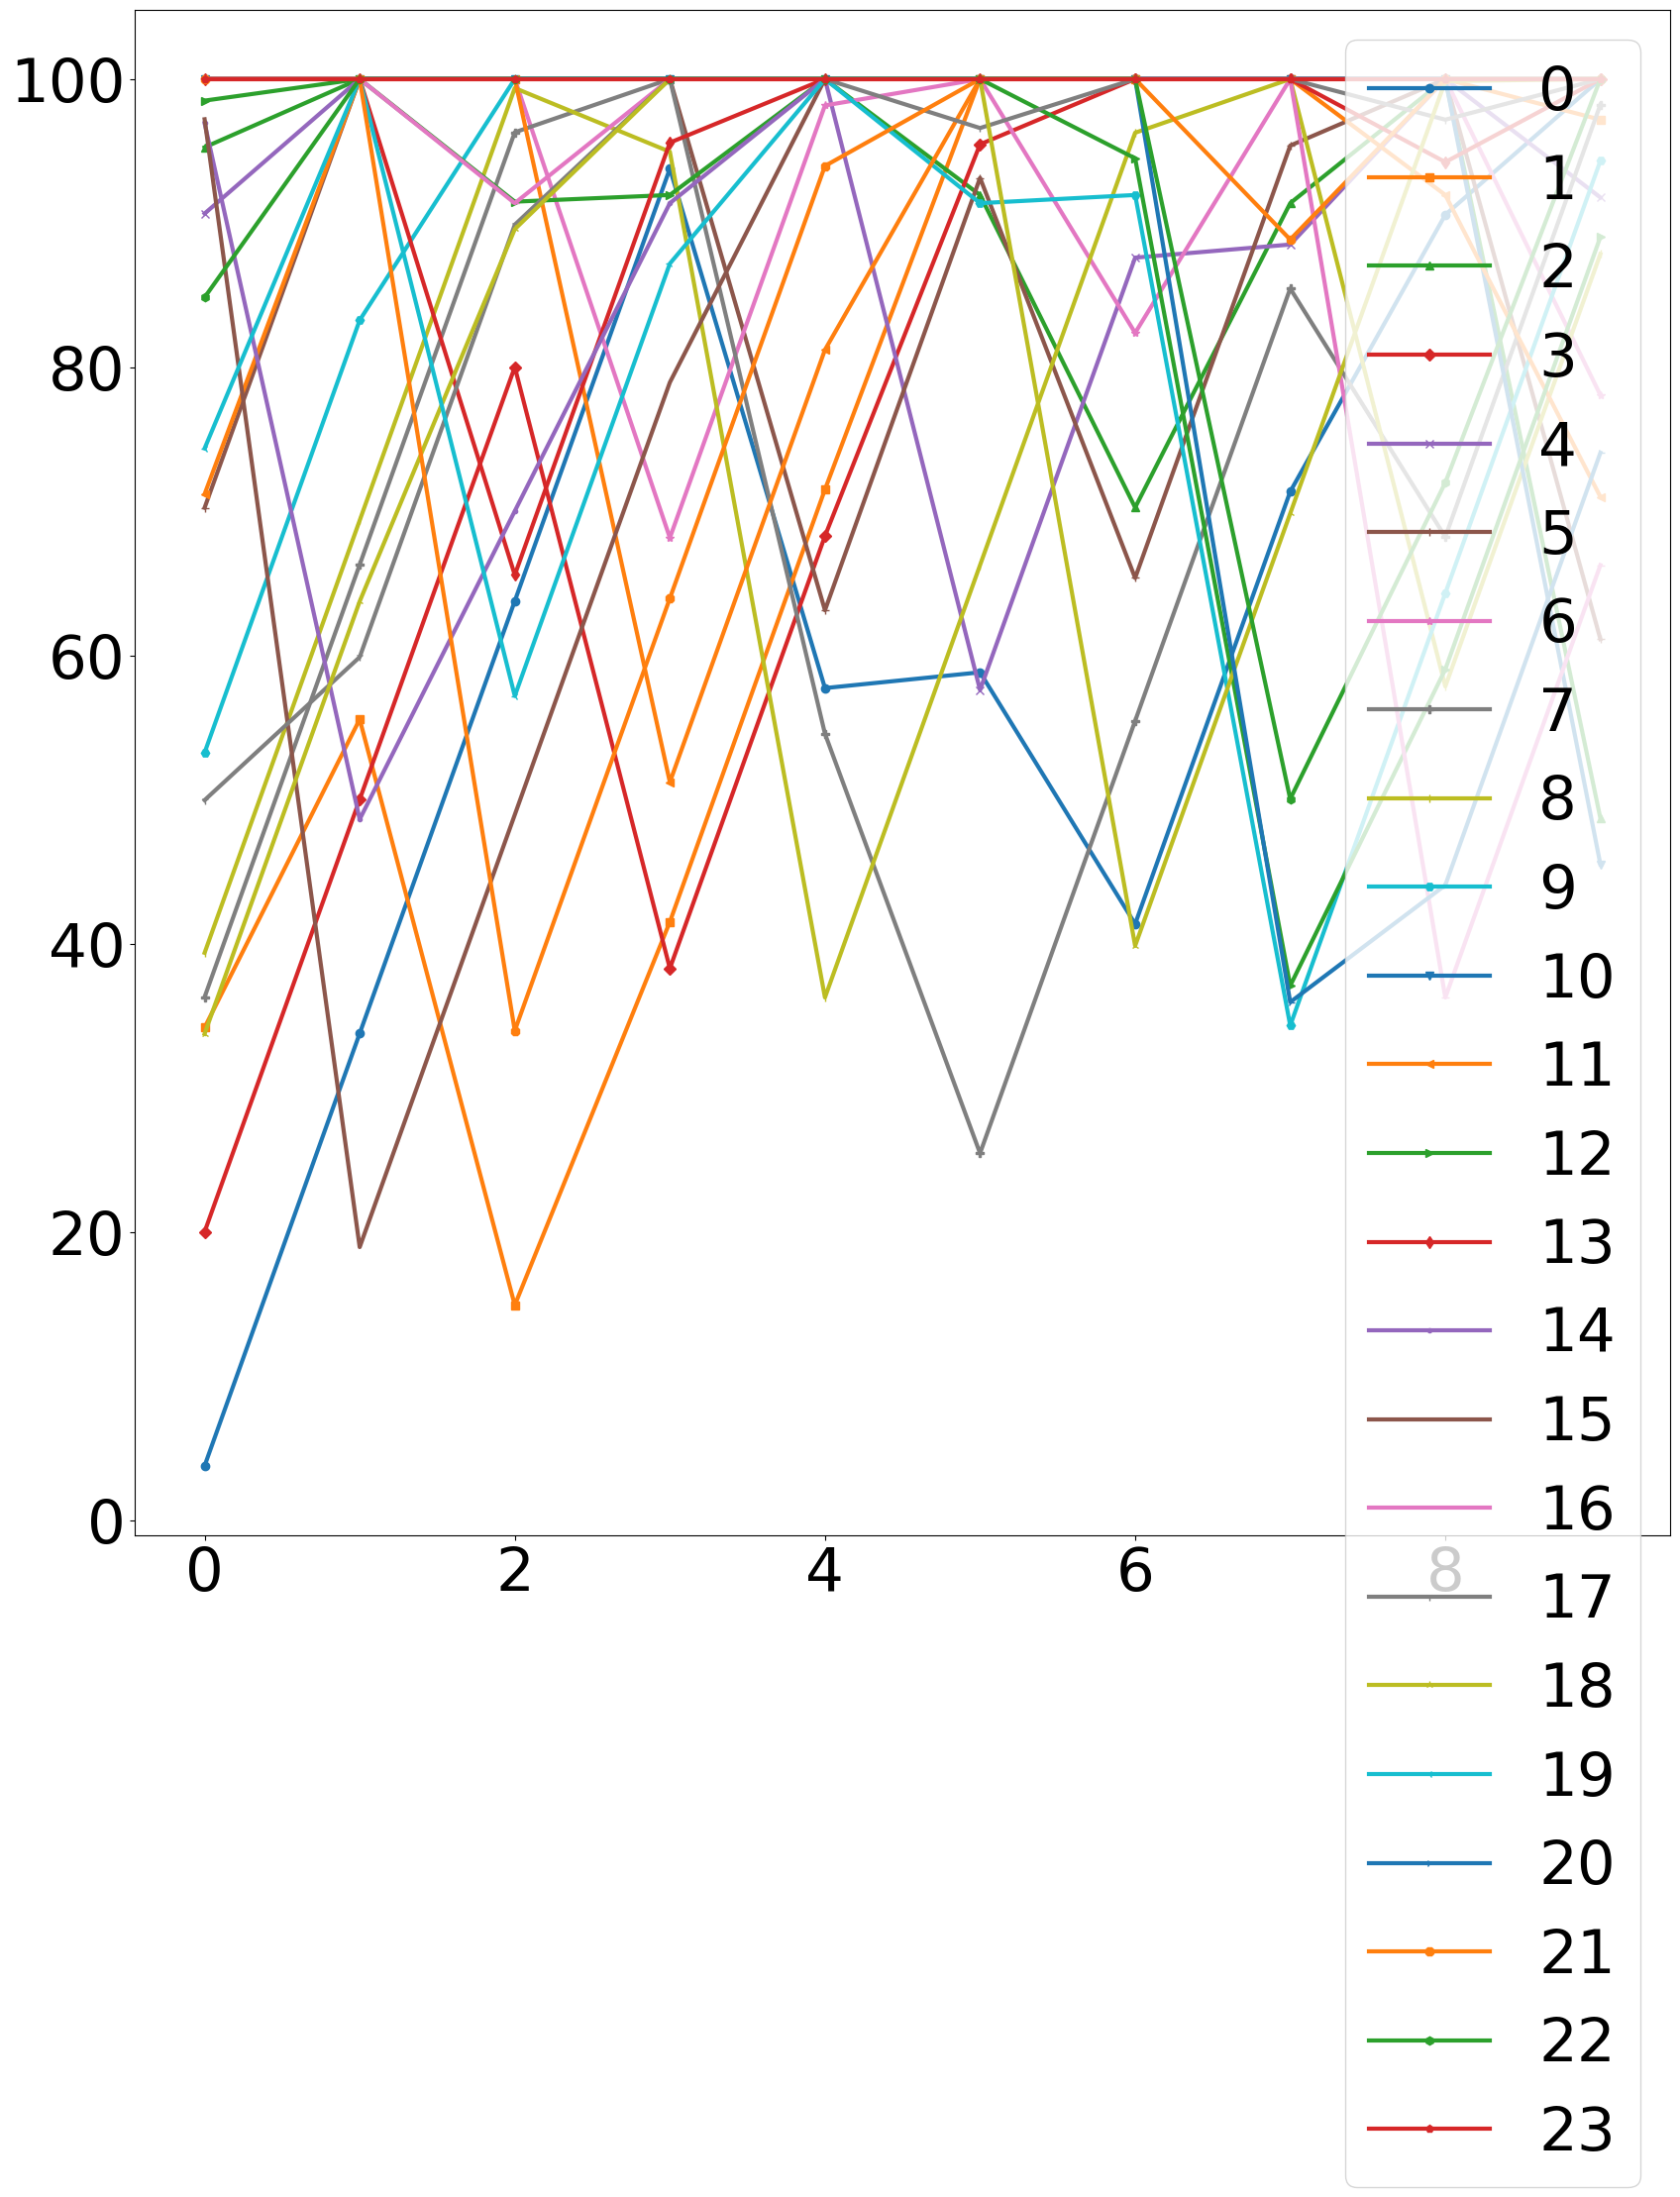

In [267]:
simple_plot_vehicle(vehicles_df_ids, list(range(24)), "old_charge", fig_size=(20, 20), line_thickness=3, plotte=True)


In [285]:
simple_plot_vehicle(vehicles_df_ids, [0,3,5,10,13], "old_charge", fig_size=(20, 20), line_thickness=3, plotte=False)


(0,3.780043567190811)
(1,33.78004356719081)
(2,63.78004356719081)
(3,93.7800435671908)
(4,57.73975766312199)
(5,58.83407213532249)
(6,41.37168379516582)
(7,71.37168379516582)
(8,90.58239512581032)
(9,100.0)
new plot
(0,20.01370958236381)
(1,50.01370958236381)
(2,80.01370958236382)
(3,38.29016303811425)
(4,68.29016303811426)
(5,95.4683481236804)
(6,100.0)
(7,100.0)
(8,100.0)
(9,100.0)
new plot
(0,70.25496782523537)
(1,100.0)
(2,100.0)
(3,100.0)
(4,63.14125109601946)
(5,93.14125109601946)
(6,65.38104039418934)
(7,95.38104039418934)
(8,100.0)
(9,61.13385500018325)
new plot
(0,100.0)
(1,100.0)
(2,100.0)
(3,100.0)
(4,100.0)
(5,100.0)
(6,100.0)
(7,100.0)
(8,100.0)
(9,45.51089458924196)
new plot
(0,100.0)
(1,100.0)
(2,65.58711780281972)
(3,95.58711780281972)
(4,100.0)
(5,100.0)
(6,100.0)
(7,100.0)
(8,94.23546)
(9,100.0)
new plot


# Customer Travel Time

In [269]:
edge_df = pd.DataFrame(columns=["edge", "distance", "time", "capacity"])


In [270]:

temp = {}
for _, edge_info_name in enumerate(edge_infos):
    e_di = pd.read_csv(os.path.join(run_folder, edge_info_name))
    edge_df = pd.concat([edge_df, e_di[edge_df.columns]])
    break
    #edge_df.loc[len(edge_df)] = {c: e_di[c][i] for c in edge_df.columns}


In [271]:
edge_df

,edge,distance,time,capacity
0,42433027-42433020,17.367300,0.347346,50
1,42433020-42433027,17.367300,0.347346,50
2,42433020-42433014,13.231400,0.264628,50
3,42433014-42433020,13.231400,0.264628,50
4,42433014-42442671,5.778400,0.115568,50
...,...,...,...,...
1617,42428020-42428007,57.665000,1.153300,50
1618,42428007-42436492,21.671700,0.433434,50
1619,42428007-42428020,57.665000,1.153300,50
1620,42443054-42450044,21.603000,0.432060,50


In [272]:
edge_df["total_edge_use"] = road_df[road_df.columns[1:]].sum(axis=1)

In [273]:
edge_df["total_distance_traveled"] = edge_df["total_edge_use"]*edge_df["distance"]
edge_df["total_time_traveled"] = edge_df["total_edge_use"]*edge_df["time"]

In [274]:
def get_average_metric(df, metric, n_vehicles):
    return df[metric].sum(), df[metric].sum()/n_vehicles

In [275]:
get_average_metric(edge_df, "total_distance_traveled", 24)

(97277.57200121344, 4053.232166717227)

In [276]:
get_average_metric(edge_df, "total_time_traveled", 24)

(1945.5514400242691, 81.06464333434455)

In [277]:

for i, road_info_name in enumerate(road_infos):
    #n = int(road_info_name.split("_")[0])
    ri_df = pd.read_csv(os.path.join(run_folder, road_info_name))
    #do this only once I guess??
    print(ri_df.head())
    break
    #road_df["edge"] = ri_df["edge"]
    #sum_rows = ri_df[ri_df.columns[2:]].sum(axis=1).astype(int)
    #road_df[n] = sum_rows


   Unnamed: 0               edge    0    1    2    3    4    5    6    7  ...  \
0           0  42433027-42433020  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1           1  42433020-42433027  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2           2  42433020-42433014  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3           3  42433014-42433020  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4           4  42433014-42442671  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

    14   15   16   17   18   19   20   21   22   23  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 26 columns]


In [278]:
sum(road_df[road_df.columns[1:]].sum(axis=1))

3321

Requests Served

In [279]:
requests_served = 0
for _, request_info_name in enumerate(requests_info):
    
    r_di = pd.read_csv(os.path.join(run_folder, request_info_name))
    #print(r_di.columns[2:])
    requests_served += r_di[r_di.columns[2:]].astype(int).sum(axis=1).sum()

print(len(r_di.columns[2:]))

10


In [280]:
requests_served

79

In [281]:
road_df_total = road_df[road_df.columns[1:]].sum(axis=1)

In [282]:
np.count_nonzero(road_df_total)

1278

In [283]:
requests_served/np.count_nonzero(road_df_total)

0.061815336463223784